# 통계적 방법에 따른 변수 선택 및 분류

- 결측치 제거 및 통계적 방법으로 선정된 컬럼을 가진 데이터를 활용
- random forest, logistic , svm classifier를 통해 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use("ggplot")


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# 통계적 방법에 따른 변수 로드

In [12]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_clean.xlsx")
x_test = pd.read_excel("../data/cip_clean_test.xlsx")

y_train = pd.read_excel("../data/cip_clean_y.xlsx")
y_test = pd.read_excel("../data/cip_clean_test_y.xlsx")

In [13]:
x_train.drop(['factor1','factor2','factor3'],axis=1,inplace=True)
x_test.drop(['factor1','factor2','factor3'],axis=1,inplace=True)

In [14]:
x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [15]:
x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        374 non-null    int64   
 1   iBT         374 non-null    float64 
 2   pCO2        374 non-null    float64 
 3   SaO2        374 non-null    float64 
 4   Hb          374 non-null    float64 
 5   Plt         374 non-null    int64   
 6   sex         374 non-null    category
 7   bed         374 non-null    category
 8   Foley       374 non-null    category
 9   Nursing     374 non-null    category
 10  Hsp-acq     374 non-null    category
 11  3m-Ab       374 non-null    category
 12  3m-Adm      374 non-null    category
 13  NR          374 non-null    category
 14  1y-UTI      374 non-null    category
 15  PPIantacid  374 non-null    category
 16  CV          374 non-null    category
dtypes: category(11), float64(4), int64(2)
memory usage: 23.0 KB


In [17]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        94 non-null     int64   
 1   iBT         94 non-null     float64 
 2   pCO2        94 non-null     float64 
 3   SaO2        94 non-null     float64 
 4   Hb          94 non-null     float64 
 5   Plt         94 non-null     int64   
 6   sex         94 non-null     category
 7   bed         94 non-null     category
 8   Foley       94 non-null     category
 9   Nursing     94 non-null     category
 10  Hsp-acq     94 non-null     category
 11  3m-Ab       94 non-null     category
 12  3m-Adm      94 non-null     category
 13  NR          94 non-null     category
 14  1y-UTI      94 non-null     category
 15  PPIantacid  94 non-null     category
 16  CV          94 non-null     category
dtypes: category(11), float64(4), int64(2)
memory usage: 6.9 KB


# 분류

## Logistic regression

In [23]:
import statsmodels.api as sm

numeric_cols=[]
for idx,col in enumerate(x_train.columns):
    col_type = x_train[col].dtype
    if col_type.name !='category':
        numeric_cols.append(col)

In [25]:
#표준화


scaler = StandardScaler()

x_train_stat_logistic = x_train.copy()
x_test_stat_logistic = x_test.copy()


x_train_stat_logistic[numeric_cols] = scaler.fit_transform(x_train_stat_logistic[numeric_cols])
x_test_stat_logistic[numeric_cols] = scaler.transform(x_test_stat_logistic[numeric_cols])




In [26]:


logit_mod = sm.Logit(y_train['CIP'], x_train_base_logistic)
results = logit_mod.fit()

#model_logistic = LogisticRegression( )
#model_logistic.fit( x_train_base_logistic, y_train['CIP'] )
#model_logistic.predict( x_test_base_logistic )

predicted = results.predict(x_test_base_logistic)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.597524
         Iterations 8
Baseline accuracy :  0.6063829787234043
Baseline recall :  0.7446808510638298


In [27]:
print(classification_report(y_true=y_test['CIP'],y_pred=predicted) )

              precision    recall  f1-score   support

           0       0.65      0.47      0.54        47
           1       0.58      0.74      0.65        47

    accuracy                           0.61        94
   macro avg       0.62      0.61      0.60        94
weighted avg       0.62      0.61      0.60        94



In [28]:
results.pvalues[results.pvalues<0.05]

Hsp-acq    0.002054
NR         0.018909
1y-UTI     0.019396
dtype: float64

In [29]:
np.exp(results.params)

iDBP          0.902361
iBT           0.873226
pCO2          1.122513
SaO2          0.205043
Hb            0.384057
Plt           1.109126
sex           0.817348
bed           1.742164
Foley         0.931423
Nursing       1.387405
Hsp-acq       3.855968
3m-Ab         1.554247
3m-Adm        0.890774
NR            0.508904
1y-UTI        2.048734
PPIantacid    0.673485
CV            0.918232
dtype: float64

## SVM

In [30]:
#표준화


scaler = StandardScaler()

x_train_stat_svm = x_train.copy()
x_test_stat_svm = x_test.copy()


x_train_stat_svm[numeric_cols] = scaler.fit_transform(x_train_stat_svm[numeric_cols])
x_test_stat_svm[numeric_cols] = scaler.transform(x_test_stat_svm[numeric_cols])




In [41]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.716216
4,10.000,0.708324
5,25.000,0.708288
1,0.010,0.702991
6,50.000,0.702955
7,100.000,0.702955
3,1.000,0.697550
0,0.001,0.502667


In [44]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [47]:
    from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.702
recall score: 0.596


## random forest

In [20]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [21]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 180, 'max_depth': 3}


In [ ]:
#model_best = RandomForestClassifier(n_estimators=180, max_depth=3,random_state=1234)

In [22]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.681
recall score: 0.617


<AxesSubplot:>

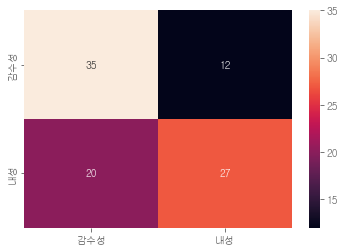

In [27]:

cm = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred = predicted), columns=['감수성','내성'], index=['감수성','내성'])
sns.heatmap(cm, annot=True)

결과적으로, 

모든 변수를 포함한 BASELINE이 0.69 었는데, 통계적 방법에 따른 선택시 0.68이 되었다.

17개의 변수를 사용했을때, shap을 이용했을 때 보다 accuracy는 떨어진다. 하지만, 더 높은 recall을 달성했다.